## Assignment 11



In [1]:
import pandas as pd
import nltk
import spacy
import matplotlib.pyplot as plt

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 5.0 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [3]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
nlp = spacy.load("en_core_web_sm")

In [5]:
raw_link = "https://github.com/kurianbenoy/DataminingLab/blob/master/Text_Clustering.xlsx?raw=true"
df = pd.read_excel(raw_link)
df.head()

,text,subject
0,The idea is to create a ticketing support syst...,NaN
1,Level 1 - Integrate Machine Learning Algorit...,NaN
2,\nCustomers could be well informed in advance ...,NaN
3,Have a high level categorization of the histor...,NaN
4,Get information from customer on the systems...,NaN


In [6]:
df.shape

(261, 2)

In [7]:
STOP_WORDS = list(spacy.lang.en.stop_words.STOP_WORDS)

def remove_stop_words(text):
  """Remove integers and stop words"""
  text_tokens = word_tokenize(text)
  filter_text_tokens = [item for item in text_tokens if not item.isdigit()]
  return [word for word in filter_text_tokens if not word in STOP_WORDS]

In [8]:
df = df.astype({"text": "str"})

In [9]:
remove_stop_words("a the Hello world 1")

['Hello', 'world']

In [10]:
df["tokenized"] = df["text"].apply(lambda x: remove_stop_words(x))

In [11]:
df.head()

,text,subject,tokenized
0,The idea is to create a ticketing support syst...,NaN,"[The, idea, create, ticketing, support, system..."
1,Level 1 - Integrate Machine Learning Algorit...,NaN,"[Level, -, Integrate, Machine, Learning, Algor..."
2,\nCustomers could be well informed in advance ...,NaN,"[Customers, informed, advance, probable, issue..."
3,Have a high level categorization of the histor...,NaN,"[Have, high, level, categorization, historical..."
4,Get information from customer on the systems...,NaN,"[Get, information, customer, systems, shows, s..."


In [12]:
stemmer = PorterStemmer()

In [13]:
def apply_stemming(tokenized_words):
  return ' '.join([stemmer.stem(plural) for plural in tokenized_words])

In [14]:
df["stemmed"] = df["tokenized"].apply(lambda x: apply_stemming(x))

In [15]:
df.head()

,text,subject,tokenized,stemmed
0,The idea is to create a ticketing support syst...,NaN,"[The, idea, create, ticketing, support, system...",the idea creat ticket support system custom lo...
1,Level 1 - Integrate Machine Learning Algorit...,NaN,"[Level, -, Integrate, Machine, Learning, Algor...",level - integr machin learn algorithm use nlp ...
2,\nCustomers could be well informed in advance ...,NaN,"[Customers, informed, advance, probable, issue...",custom inform advanc probabl issu resolut prod...
3,Have a high level categorization of the histor...,NaN,"[Have, high, level, categorization, historical...",have high level categor histor issu identifi s...
4,Get information from customer on the systems...,NaN,"[Get, information, customer, systems, shows, s...",get inform custom system show spike oper cost ...


In [16]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["stemmed"])
print("n_samples: %d, n_features: %d" % X.shape)

n_samples: 261, n_features: 2786


## Prediction with Kmeans (from question 8 to 11)

In [17]:
model = KMeans(n_clusters=7, max_iter=100,init = 'k-means++', random_state = 42)
model.fit(X)


KMeans(max_iter=100, n_clusters=7, random_state=42)

<bound method CountVectorizer.get_feature_names of TfidfVectorizer()>

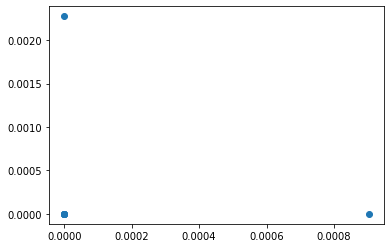

In [18]:
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],cmap='viridis')
vectorizer.get_feature_names

In [36]:
print("Cluster centroids")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(7):
    print("Centroid for Cluster {}: {}".format(i,terms[order_centroids[i][0]]))
    print(terms[order_centroids[i][0]])

Cluster centroids
Centroid for Cluster 0: nan
nan
Centroid for Cluster 1: ticket
ticket
Centroid for Cluster 2: mar
mar
Centroid for Cluster 3: locat
locat
Centroid for Cluster 4: data
data
Centroid for Cluster 5: user
user
Centroid for Cluster 6: credit
credit


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Prediction for Question 10

In [19]:
sample_text = "You should have told me yesterday"
preprocessed_words = remove_stop_words(sample_text)
preprocessed_words

['You', 'told', 'yesterday']

In [20]:
preprocessed_stemming = apply_stemming(preprocessed_words)
preprocessed_stemming

'you told yesterday'

In [21]:
inference_text_df = pd.DataFrame({'processed_text': preprocessed_stemming}, index=[0])

In [22]:
inference_text_df['processed_text']

0    you told yesterday
Name: processed_text, dtype: object

In [32]:
inference_vectorizer = TfidfVectorizer()
sample_vectorized = vectorizer.transform(inference_text_df['processed_text'])

In [33]:
sample_vectorized

<1x2786 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [34]:
result = model.predict(sample_vectorized)

In [35]:
result

array([5], dtype=int32)